In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('age_gender.csv')

### Exploring the Dataset

In [3]:
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [4]:
x = np.array([float(i) for i in data['pixels'][0].split()])

In [5]:
len(x)

2304

In [6]:
2304**0.5

48.0

In [7]:
x = x.reshape((48, 48))

In [8]:
x

array([[129., 128., 128., ..., 118.,  99.,  53.],
       [130., 129., 128., ..., 117.,  98.,  52.],
       [131., 129., 130., ..., 114.,  97.,  50.],
       ...,
       [121., 138., 147., ..., 151., 150., 148.],
       [117., 137., 146., ..., 149., 148., 148.],
       [115., 135., 142., ..., 146., 146., 146.]])

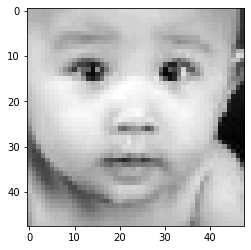

In [9]:
plt.imshow(x, cmap = 'gray')

In [10]:
data.shape

(23705, 5)

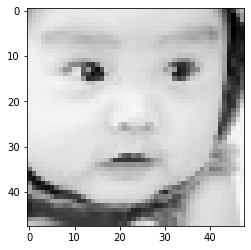

In [11]:
x = np.array([float(i) for i in data['pixels'][100].split()]) 
plt.imshow(x.reshape((48,48)), cmap='gray')

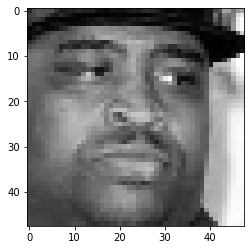

In [12]:
x = np.array([float(i) for i in data['pixels'][10000].split()]) 
plt.imshow(x.reshape((48,48)), cmap='gray')

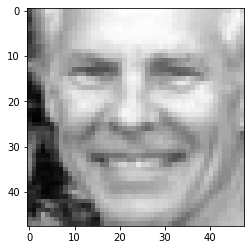

In [13]:
x = np.array([float(i) for i in data['pixels'][20000].split()]) 
plt.imshow(x.reshape((48,48)), cmap='gray')

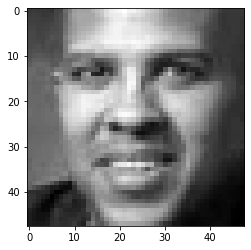

In [14]:
x = np.array([float(i) for i in data['pixels'][15000].split()]) 
plt.imshow(x.reshape((48,48)), cmap='gray')

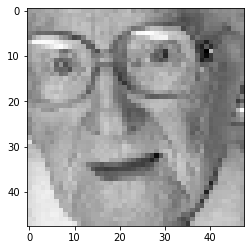

In [15]:
x = np.array([float(i) for i in data['pixels'][23704].split()]) 
plt.imshow(x.reshape((48,48)), cmap='gray')

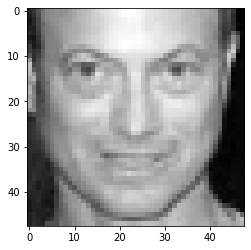

In [16]:
x = np.array([float(i) for i in data['pixels'][16000].split()]) 
plt.imshow(x.reshape((48,48)), cmap='gray')

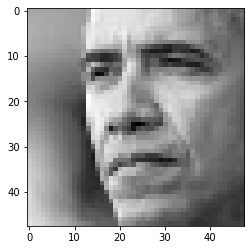

In [17]:
x = np.array([float(i) for i in data['pixels'][18770].split()]) 
plt.imshow(x.reshape((48,48)), cmap='gray')

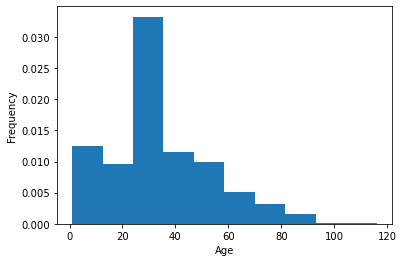

In [18]:
plt.hist(data['age'], density = True)
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

In [19]:
ethnicities = list(pd.unique(data['ethnicity']))

In [20]:
ethnicities

[2, 3, 4, 0, 1]

In [21]:
count_of_ethnicities = pd.value_counts(data['ethnicity'])

In [22]:
list(count_of_ethnicities)

[10078, 4526, 3975, 3434, 1692]

In [23]:
dict(count_of_ethnicities)

{0: 10078, 1: 4526, 3: 3975, 2: 3434, 4: 1692}

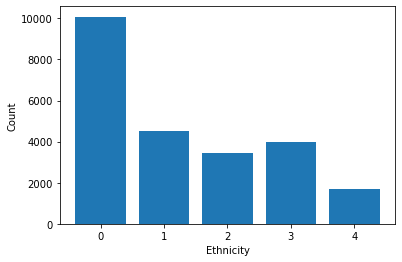

In [24]:
plt.bar(dict(count_of_ethnicities).keys(), dict(count_of_ethnicities).values())
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()

In [25]:
count_of_gender = dict(pd.value_counts(data['gender']))

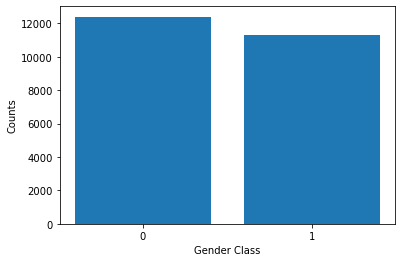

In [26]:
plt.bar(count_of_gender.keys(), count_of_gender.values())
plt.xticks([0,1])
plt.xlabel('Gender Class')
plt.ylabel('Counts')
plt.show()

### Preprocessing

In [27]:
def to_array(array):
    arr = np.array(array.split(), dtype='float64')
    arr = arr.reshape((48, 48))
    return arr

In [28]:
%%time
data['pixels'] = data['pixels'].apply(to_array)

Wall time: 7.48 s


In [29]:
pixels = np.reshape(data['pixels'].to_list(), (data.shape[0], 48,48,1))

In [30]:
pixels

array([[[[129.],
         [128.],
         [128.],
         ...,
         [118.],
         [ 99.],
         [ 53.]],

        [[130.],
         [129.],
         [128.],
         ...,
         [117.],
         [ 98.],
         [ 52.]],

        [[131.],
         [129.],
         [130.],
         ...,
         [114.],
         [ 97.],
         [ 50.]],

        ...,

        [[121.],
         [138.],
         [147.],
         ...,
         [151.],
         [150.],
         [148.]],

        [[117.],
         [137.],
         [146.],
         ...,
         [149.],
         [148.],
         [148.]],

        [[115.],
         [135.],
         [142.],
         ...,
         [146.],
         [146.],
         [146.]]],


       [[[164.],
         [ 74.],
         [111.],
         ...,
         [111.],
         [111.],
         [104.]],

        [[179.],
         [ 70.],
         [128.],
         ...,
         [112.],
         [113.],
         [108.]],

        [[176.],
         [ 71.],
      

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(pixels, np.array(data['age']),
                                                                               random_state = 42, 
                                                                               test_size = 0.15)
x_train_age, x_val_age, y_train_age, y_val_age = train_test_split(pixels, np.array(data['age']),
                                                                  random_state = 30, test_size = 0.2)

In [33]:
print(x_train_age.shape)

(18964, 48, 48, 1)


In [35]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [36]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.17, 
                                   shear_range = 0.20, 
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255, 
                                 zoom_range = 0.17, 
                                 shear_range = 0.20, 
                                 horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [37]:
train_age_dataset = train_datagen.flow(x_train_age, y_train_age, batch_size = 32)

val_age_dataset = val_datagen.flow(x_val_age, y_val_age, batch_size = 32)

test_age_dataset = test_datagen.flow(x_test_age, y_test_age, batch_size = 32, shuffle = False)

In [38]:
def show_batch(img, label):
    plt.figure(figsize = [24, 15])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(img[i])
        plt.title(f'Age:{label[i]}')
        plt.axis('off')
    plt.show()

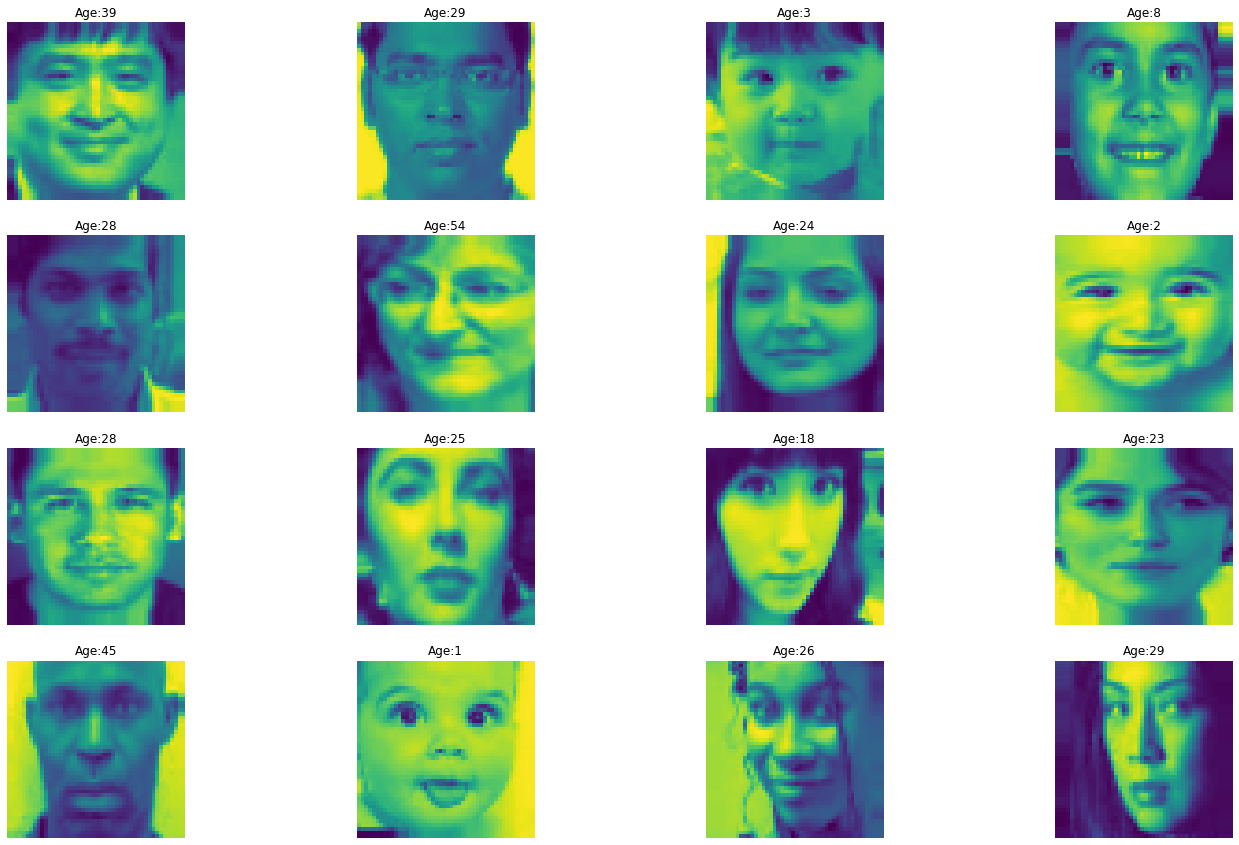

In [39]:
X , Y = next(train_age_dataset)
show_batch(X , Y)

In [40]:
model_age = keras.Sequential([
                          keras.layers.Conv2D(32, (3,3), (1,1), activation = 'relu', input_shape = (48, 48, 1)),
                          keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                          keras.layers.MaxPooling2D(pool_size = (2,2)),
                          
                          keras.layers.Dropout(0.25),
                          
                          keras.layers.Conv2D(128, (3,3), activation = 'relu'), 
                          # keras.layers.Conv2D(256, (3,3), activation = 'relu'), 
                          
                          keras.layers.Flatten(), 
                          
                          keras.layers.Dense(128, activation = 'relu'),
                          keras.layers.Dense(1)
                          
])

In [41]:
model_age.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                        

In [42]:
model_age.compile(optimizer='adam', loss='mse', metrics = [keras.metrics.mean_absolute_error])

In [43]:
call_backs = [keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience = 3), 
              keras.callbacks.ModelCheckpoint('model_age.h5', verbose = 1, save_best_only=True)]

In [44]:
model_age_history = model_age.fit(train_age_dataset, epochs = 5, validation_data = val_age_dataset, callbacks = call_backs)

Epoch 1/5
593/593 [==============================] - ETA: 0s - loss: 300.3073 - mean_absolute_error: 13.1995
Epoch 00001: val_loss improved from inf to 216.18222, saving model to model_age.h5
593/593 [==============================] - 73s 123ms/step - loss: 300.3073 - mean_absolute_error: 13.1995 - val_loss: 216.1822 - val_mean_absolute_error: 11.3926
Epoch 2/5
593/593 [==============================] - ETA: 0s - loss: 185.8157 - mean_absolute_error: 10.2433
Epoch 00002: val_loss improved from 216.18222 to 153.86392, saving model to model_age.h5
593/593 [==============================] - 73s 123ms/step - loss: 185.8157 - mean_absolute_error: 10.2433 - val_loss: 153.8639 - val_mean_absolute_error: 9.1815
Epoch 3/5
593/593 [==============================] - ETA: 0s - loss: 149.8558 - mean_absolute_error: 9.0855
Epoch 00003: val_loss improved from 153.86392 to 138.85286, saving model to model_age.h5
593/593 [==============================] - 72s 122ms/step - loss: 149.8558 - mean_absolute

In [45]:
model_age.evaluate(test_age_dataset, verbose = 1)

112/112 [==============================] - 3s 24ms/step - loss: 97.1797 - mean_absolute_error: 7.1905


[97.17967224121094, 7.19053840637207]

In [46]:
model_age_history

Text(0.5, 1.0, 'Loss')

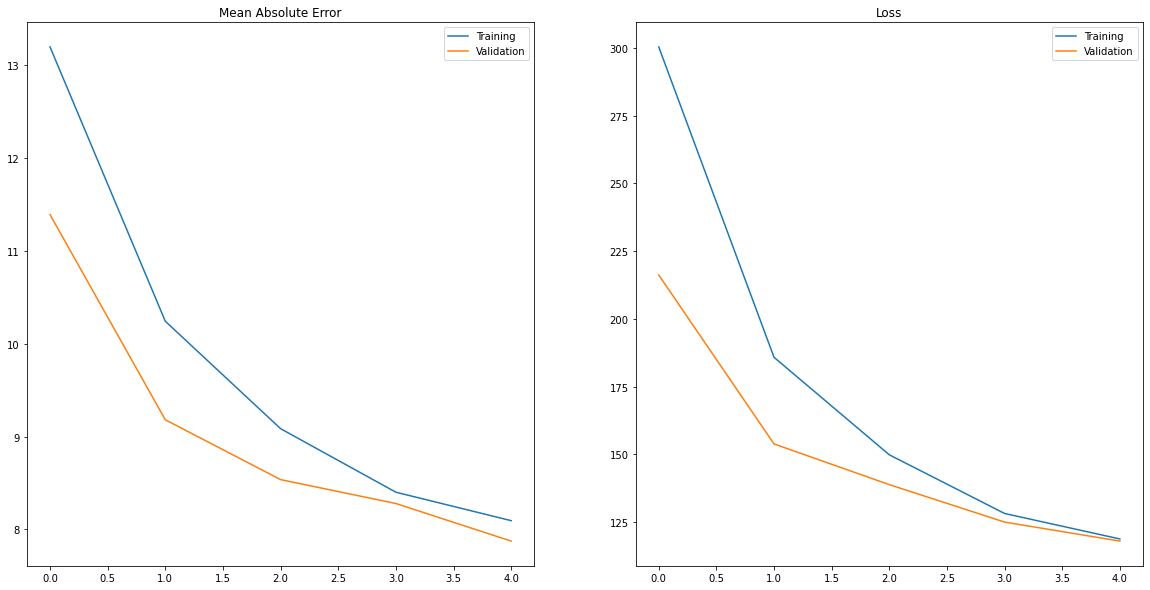

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20, 10))
axes[0].plot(model_age_history.epoch, model_age_history.history['mean_absolute_error'], label = 'Training')
axes[0].plot(model_age_history.epoch, model_age_history.history['val_mean_absolute_error'], label = 'Validation')
axes[0].legend(loc = 'upper right')
axes[0].set_title('Mean Absolute Error')
axes[1].plot(model_age_history.epoch, model_age_history.history['loss'], label = 'Training')
axes[1].plot(model_age_history.epoch, model_age_history.history['val_loss'], label = 'Validation')
axes[1].legend(loc = 'upper right')
axes[1].set_title('Loss')

#### Age Predictions

In [48]:
pred_Age = model_age.predict(test_age_dataset, verbose = 2)

112/112 - 3s - 3s/epoch - 23ms/step


In [49]:
pred_age_list = []
for i in pred_Age:
    pred_age_list.append(np.round(i[0], 2))

In [65]:
def plot_predictions(image, pred, actual):
    plt.figure(figsize = [24, 15])
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image[i])
        plt.xlabel(f'Actual Age: {actual[i]}')
        plt.ylabel(f'Predicted Age: {pred[i]}')
    plt.show()

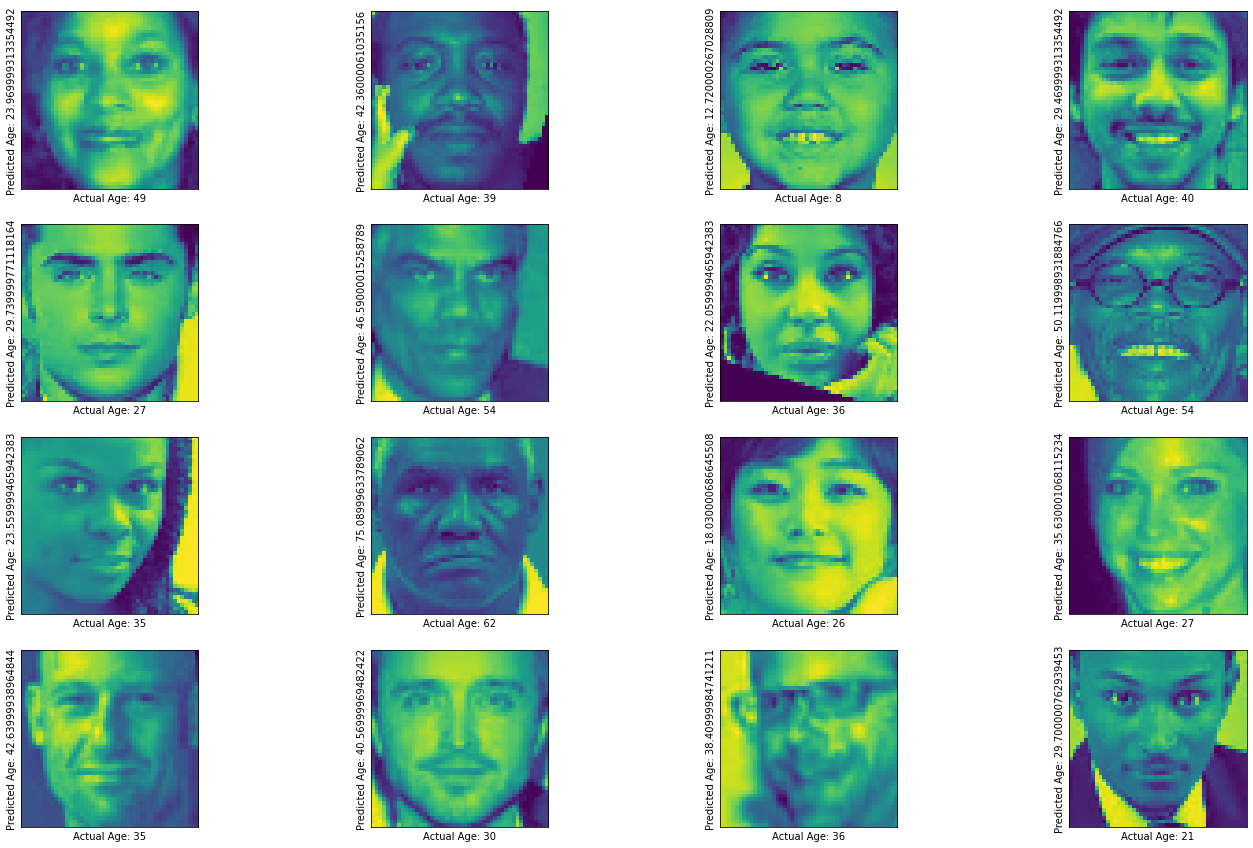

In [66]:
plot_predictions(x_test_age, pred_age_list, y_test_age)

### Gender Prediction

In [68]:
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(pixels, np.array(data['gender']), 
                                                                                random_state = 42, test_size = 0.15)
x_train_gender, x_val_gender, y_train_gender, y_val_gender = train_test_split(pixels, np.array(data['gender']), 
                                                                                random_state = 30, test_size = 0.20)

In [69]:
x_train_gender.shape

(18964, 48, 48, 1)

In [70]:
x_val_gender.shape

(4741, 48, 48, 1)

In [71]:
gender = ['Male', 'Female']

In [72]:
train_gender_dataset = train_datagen.flow(x_train_gender, y_train_gender, batch_size = 32)

val_gender_dataset = val_datagen.flow(x_val_gender, y_val_gender, batch_size = 32)

test_gender_dataset = test_datagen.flow(x_test_gender, y_test_gender, batch_size = 32, shuffle = False)

In [73]:
def show_batch(img, label):
    plt.figure(figsize = [24, 15])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(img[i])
        plt.title(f'Gender:{gender[label[i]]}')
        plt.axis('off')
    plt.show()

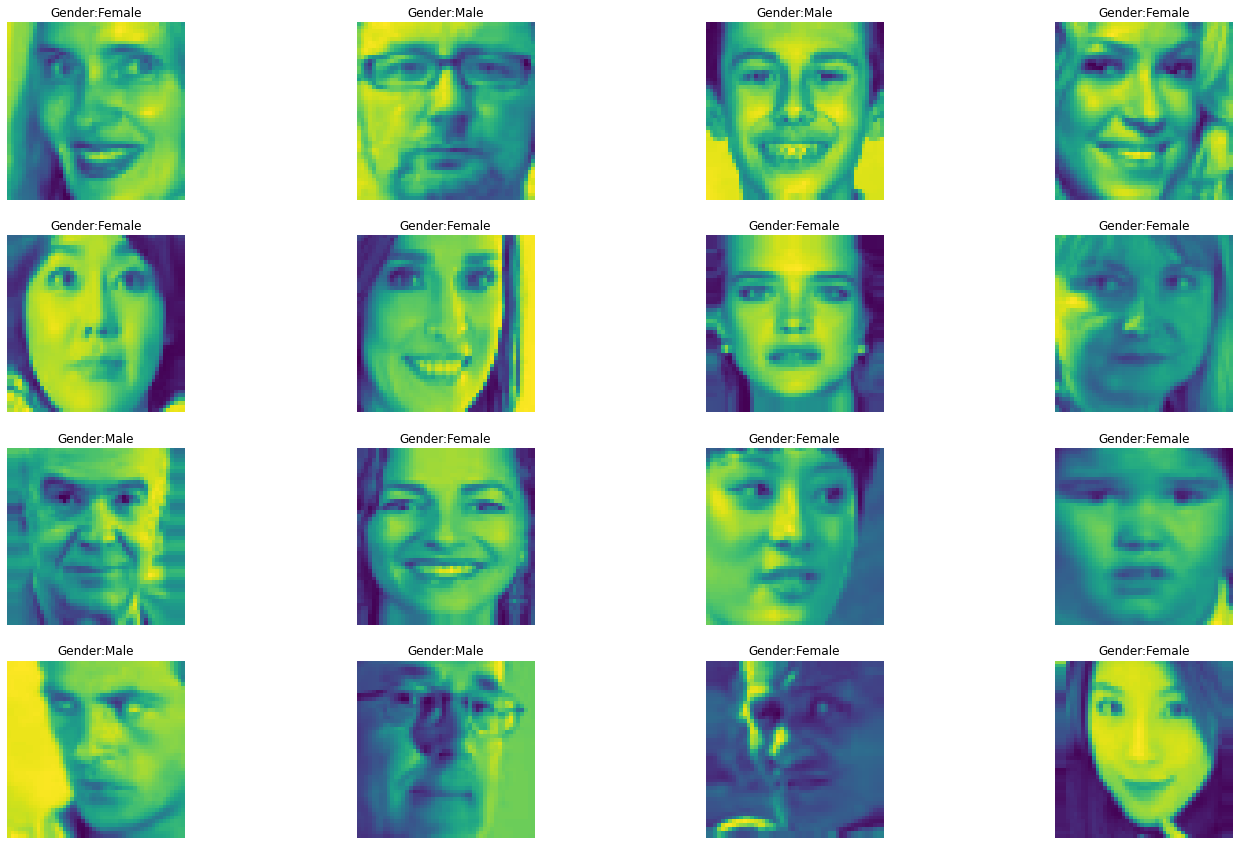

In [74]:
A,B = next(train_gender_dataset)
show_batch(A,B)

In [85]:
model_gender = keras.Sequential([
                          keras.layers.Conv2D(32, (3,3), (1,1), activation = 'relu', input_shape = (48, 48, 1)),
                          keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                          keras.layers.MaxPooling2D(pool_size = (2,2)),
                          
                          keras.layers.Dropout(0.25),
                          
                          keras.layers.Conv2D(128, (3,3), activation = 'relu'), 
                          # keras.layers.Conv2D(256, (3,3), activation = 'relu'), 
                          
                          keras.layers.Flatten(), 
                          
                          keras.layers.Dense(128, activation = 'relu'),
                          keras.layers.Dense(1, activation='sigmoid')
                          
])

In [86]:
model_gender.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                      

In [87]:
model_gender.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [88]:
call_backs = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 3), 
              keras.callbacks.ModelCheckpoint('model_gender.h5', verbose = 1, save_best_only=True)]

In [89]:
model_gender_history = model_gender.fit(train_gender_dataset, epochs = 8, validation_data = val_gender_dataset, callbacks = call_backs)

Epoch 1/8
593/593 [==============================] - ETA: 0s - loss: 0.4946 - accuracy: 0.7508
Epoch 00001: val_loss improved from inf to 0.39921, saving model to model_gender.h5
593/593 [==============================] - 75s 127ms/step - loss: 0.4946 - accuracy: 0.7508 - val_loss: 0.3992 - val_accuracy: 0.8232
Epoch 2/8
593/593 [==============================] - ETA: 0s - loss: 0.3742 - accuracy: 0.8303
Epoch 00002: val_loss improved from 0.39921 to 0.31840, saving model to model_gender.h5
593/593 [==============================] - 79s 133ms/step - loss: 0.3742 - accuracy: 0.8303 - val_loss: 0.3184 - val_accuracy: 0.8604
Epoch 3/8
593/593 [==============================] - ETA: 0s - loss: 0.3372 - accuracy: 0.8467
Epoch 00003: val_loss improved from 0.31840 to 0.31444, saving model to model_gender.h5
593/593 [==============================] - 82s 137ms/step - loss: 0.3372 - accuracy: 0.8467 - val_loss: 0.3144 - val_accuracy: 0.8557
Epoch 4/8
593/593 [==============================] - 

In [90]:
model_gender.evaluate(test_gender_dataset, verbose = 1)

112/112 [==============================] - 3s 24ms/step - loss: 0.2258 - accuracy: 0.9016


[0.2257552295923233, 0.9015747904777527]

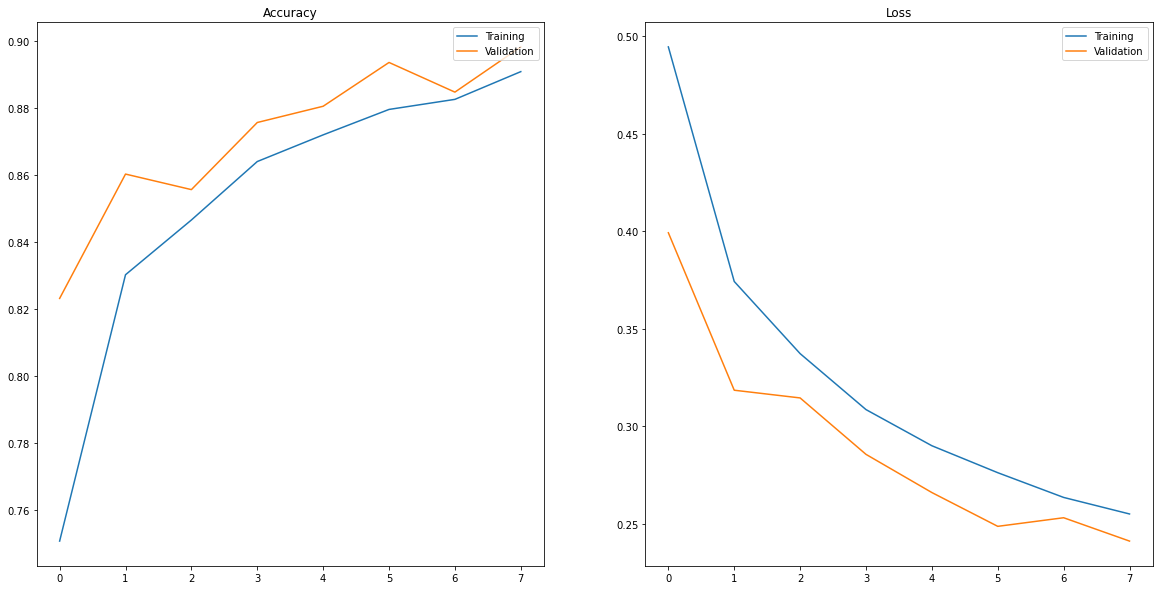

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20, 10))
axes[0].plot(model_gender_history.epoch, model_gender_history.history['accuracy'], label = 'Training')
axes[0].plot(model_gender_history.epoch, model_gender_history.history['val_accuracy'], label = 'Validation')
axes[0].legend(loc = 'upper right')
axes[0].set_title('Accuracy')
axes[1].plot(model_gender_history.epoch, model_gender_history.history['loss'], label = 'Training')
axes[1].plot(model_gender_history.epoch, model_gender_history.history['val_loss'], label = 'Validation')
axes[1].legend(loc = 'upper right')
axes[1].set_title('Loss')
plt.show()

In [93]:
pred_gender = model_gender.predict(test_gender_dataset)

In [94]:
pred_gen = []
for i in pred_gender:
    pred_gen.append(int(np.round(i[0])))

In [96]:
from sklearn.metrics import classification_report

In [100]:
from sklearn.metrics import confusion_matrix

In [98]:
print(classification_report(pred_gen, y_test_gender))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1749
           1       0.93      0.87      0.90      1807

    accuracy                           0.90      3556
   macro avg       0.90      0.90      0.90      3556
weighted avg       0.90      0.90      0.90      3556



In [99]:
import seaborn as sns

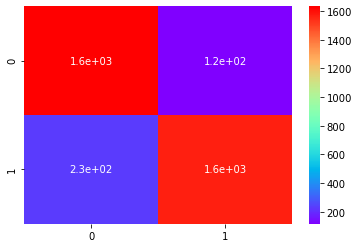

In [104]:
sns.heatmap(confusion_matrix(pred_gen, y_test_gender), cmap = 'rainbow', annot=True)
plt.show()

In [107]:
def plot_predictions(image, pred, actual):
    plt.figure(figsize = [24, 15])
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image[i])
        plt.xlabel(f'Actual Gender: {gender[actual[i]]}')
        plt.ylabel(f'Predicted Gender: {gender[pred[i]]}')
    plt.show()

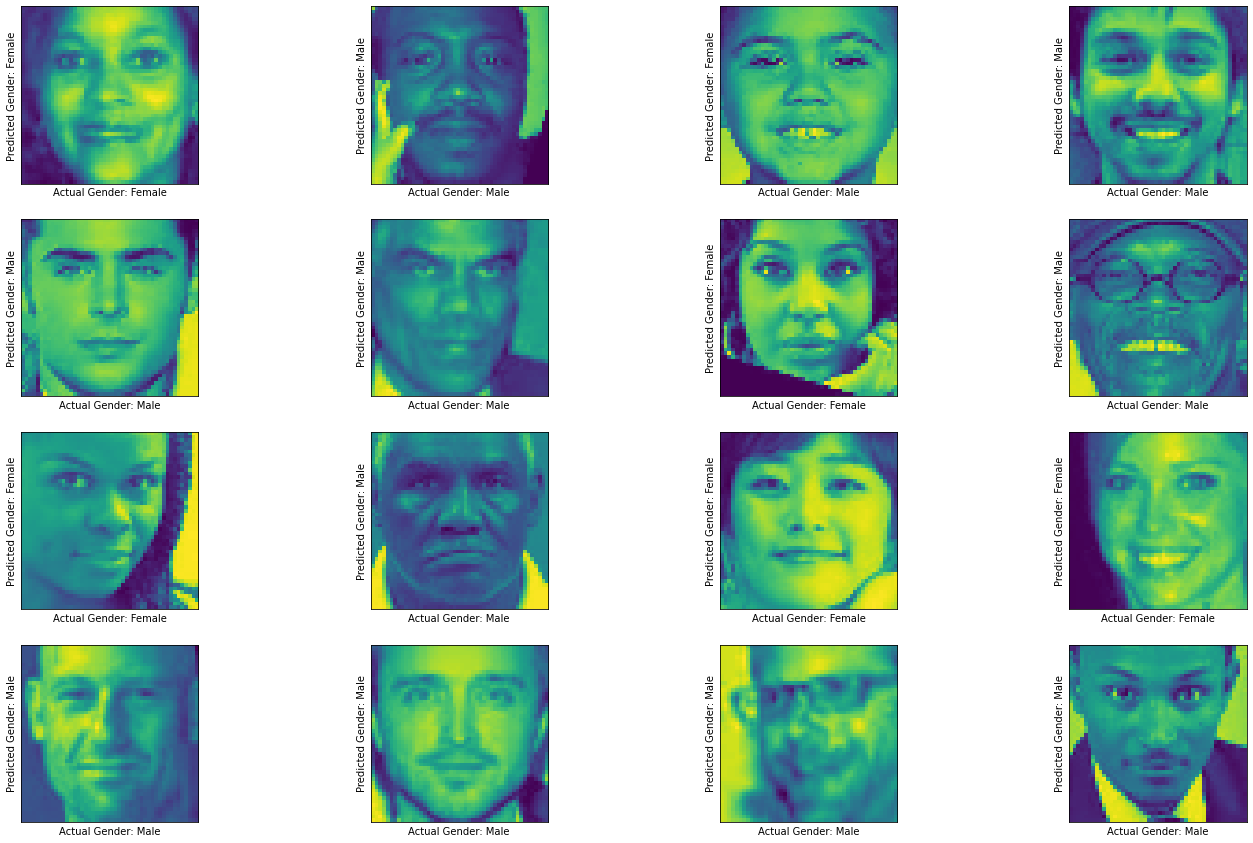

In [108]:
plot_predictions(x_test_gender, pred_gen, y_test_gender)

### Ethnicity Prediction

In [109]:
x_train_ethnicity, x_test_ethnicity, y_train_ethnicity, y_test_ethnicity = train_test_split(pixels, np.array(data['ethnicity']), 
                                                                                random_state = 42, test_size = 0.15)
x_train_ethnicity, x_val_ethnicity, y_train_ethnicity, y_val_ethnicity = train_test_split(pixels, np.array(data['ethnicity']), 
                                                                                random_state = 30, test_size = 0.20)

In [110]:
train_ethnicity_dataset = train_datagen.flow(x_train_ethnicity, y_train_ethnicity, batch_size = 32)

val_ethnicity_dataset = val_datagen.flow(x_val_ethnicity, y_val_ethnicity, batch_size = 32)

test_ethnicity_dataset = test_datagen.flow(x_test_ethnicity, y_test_ethnicity, batch_size = 32, shuffle = False)

In [115]:
def show_batch(img, label):
    plt.figure(figsize = [24, 15])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(img[i],)
        plt.title(f'Ethnicity:{label[i]}')
        plt.axis('off')
    plt.show()

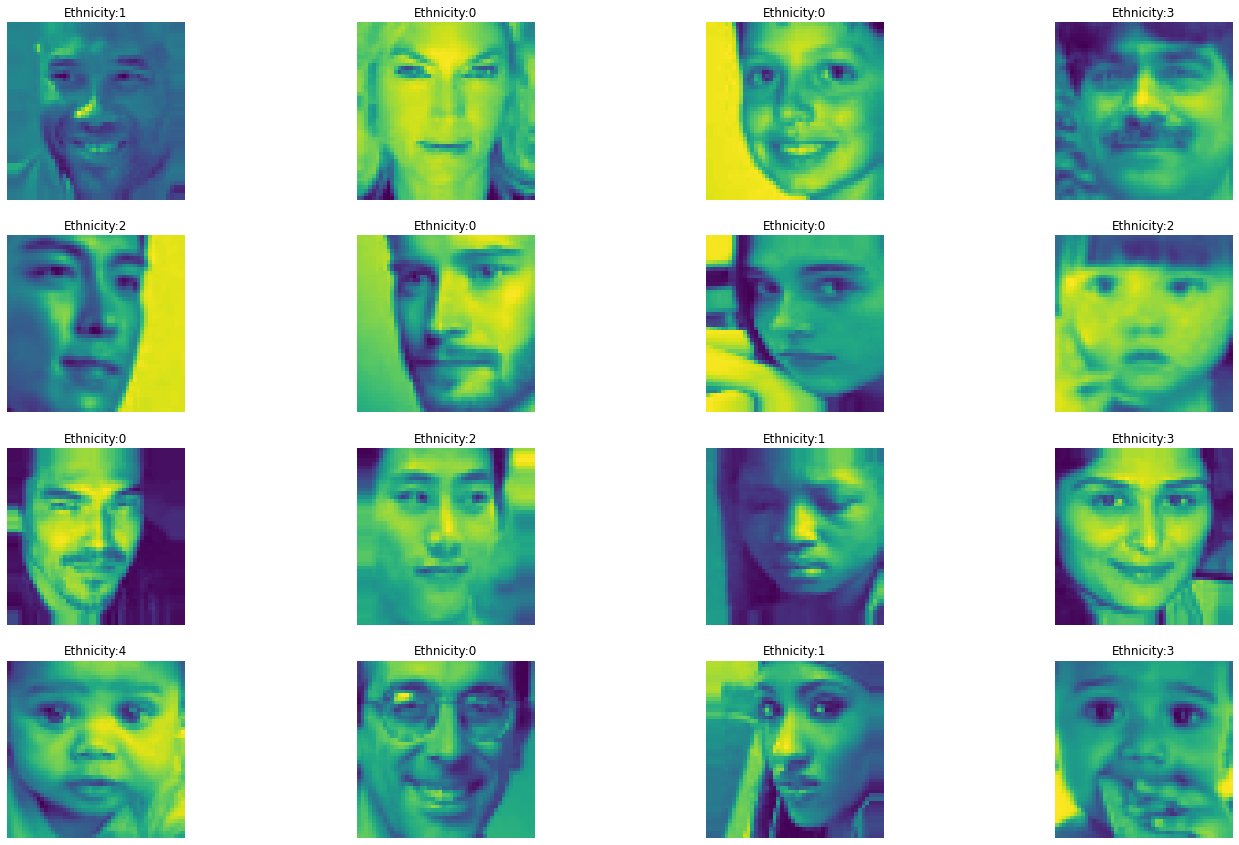

In [118]:
C,D = next(train_ethnicity_dataset)
show_batch(C,D)

In [119]:
model_ethnicity = keras.Sequential([
                          keras.layers.Conv2D(32, (3,3), (1,1), activation = 'relu', input_shape = (48, 48, 1)),
                          keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                          keras.layers.MaxPooling2D(pool_size = (2,2)),
                          
                          keras.layers.Dropout(0.25),
                          
                          keras.layers.Conv2D(128, (3,3), activation = 'relu'), 
                          # keras.layers.Conv2D(256, (3,3), activation = 'relu'), 
                          
                          keras.layers.Flatten(), 
                          
                          keras.layers.Dense(128, activation = 'relu'),
                          keras.layers.Dense(5, activation='softmax')
                          
])

In [120]:
model_ethnicity.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 flatten_4 (Flatten)         (None, 51200)             0         
                                                      

In [121]:
model_ethnicity.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [122]:
call_backs = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 3), 
              keras.callbacks.ModelCheckpoint('model_ethnicity.h5', verbose = 1, save_best_only=True)]

In [123]:
model_ethnicity_history = model_ethnicity.fit(train_ethnicity_dataset, epochs = 10, validation_data = val_ethnicity_dataset, 
                                              callbacks = call_backs)

Epoch 1/10
593/593 [==============================] - ETA: 0s - loss: 1.0839 - accuracy: 0.5899
Epoch 00001: val_loss improved from inf to 0.85792, saving model to model_ethnicity.h5
593/593 [==============================] - 75s 125ms/step - loss: 1.0839 - accuracy: 0.5899 - val_loss: 0.8579 - val_accuracy: 0.7032
Epoch 2/10
593/593 [==============================] - ETA: 0s - loss: 0.8153 - accuracy: 0.7095
Epoch 00002: val_loss improved from 0.85792 to 0.76943, saving model to model_ethnicity.h5
593/593 [==============================] - 71s 120ms/step - loss: 0.8153 - accuracy: 0.7095 - val_loss: 0.7694 - val_accuracy: 0.7287
Epoch 3/10
593/593 [==============================] - ETA: 0s - loss: 0.7353 - accuracy: 0.7393
Epoch 00003: val_loss improved from 0.76943 to 0.71703, saving model to model_ethnicity.h5
593/593 [==============================] - 72s 122ms/step - loss: 0.7353 - accuracy: 0.7393 - val_loss: 0.7170 - val_accuracy: 0.7501
Epoch 4/10
593/593 [=====================

In [124]:
model_ethnicity.evaluate(test_ethnicity_dataset, verbose = 1)

112/112 [==============================] - 3s 23ms/step - loss: 0.5037 - accuracy: 0.8251


[0.5036563873291016, 0.825084388256073]

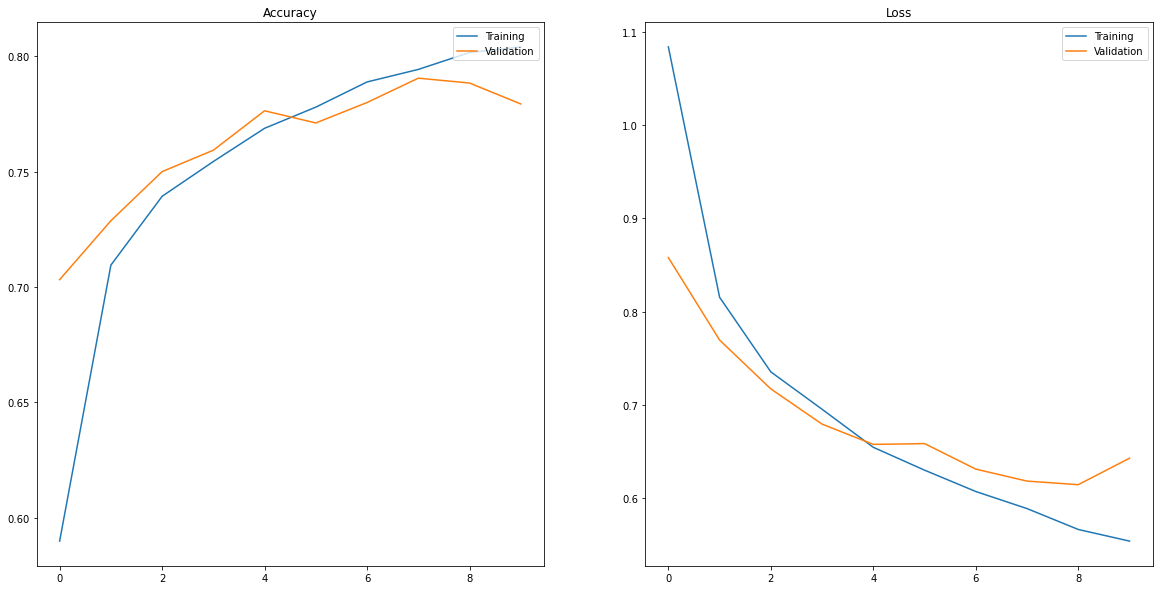

In [125]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20, 10))
axes[0].plot(model_ethnicity_history.epoch, model_ethnicity_history.history['accuracy'], label = 'Training')
axes[0].plot(model_ethnicity_history.epoch, model_ethnicity_history.history['val_accuracy'], label = 'Validation')
axes[0].legend(loc = 'upper right')
axes[0].set_title('Accuracy')
axes[1].plot(model_ethnicity_history.epoch, model_ethnicity_history.history['loss'], label = 'Training')
axes[1].plot(model_ethnicity_history.epoch, model_ethnicity_history.history['val_loss'], label = 'Validation')
axes[1].legend(loc = 'upper right')
axes[1].set_title('Loss')
plt.show()

In [126]:
pred_ethnicity = model_ethnicity.predict(test_ethnicity_dataset)

In [127]:
pred_ethnicity = [np.argmax(i) for i in pred_ethnicity]

In [128]:
pred_ethnicity[:8]

[3, 1, 1, 4, 0, 1, 1, 1]

In [129]:
print(classification_report(pred_ethnicity, y_test_ethnicity))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1551
           1       0.93      0.83      0.88       766
           2       0.93      0.76      0.84       600
           3       0.75      0.83      0.79       544
           4       0.22      0.58      0.32        95

    accuracy                           0.83      3556
   macro avg       0.74      0.77      0.74      3556
weighted avg       0.86      0.83      0.84      3556



<AxesSubplot:>

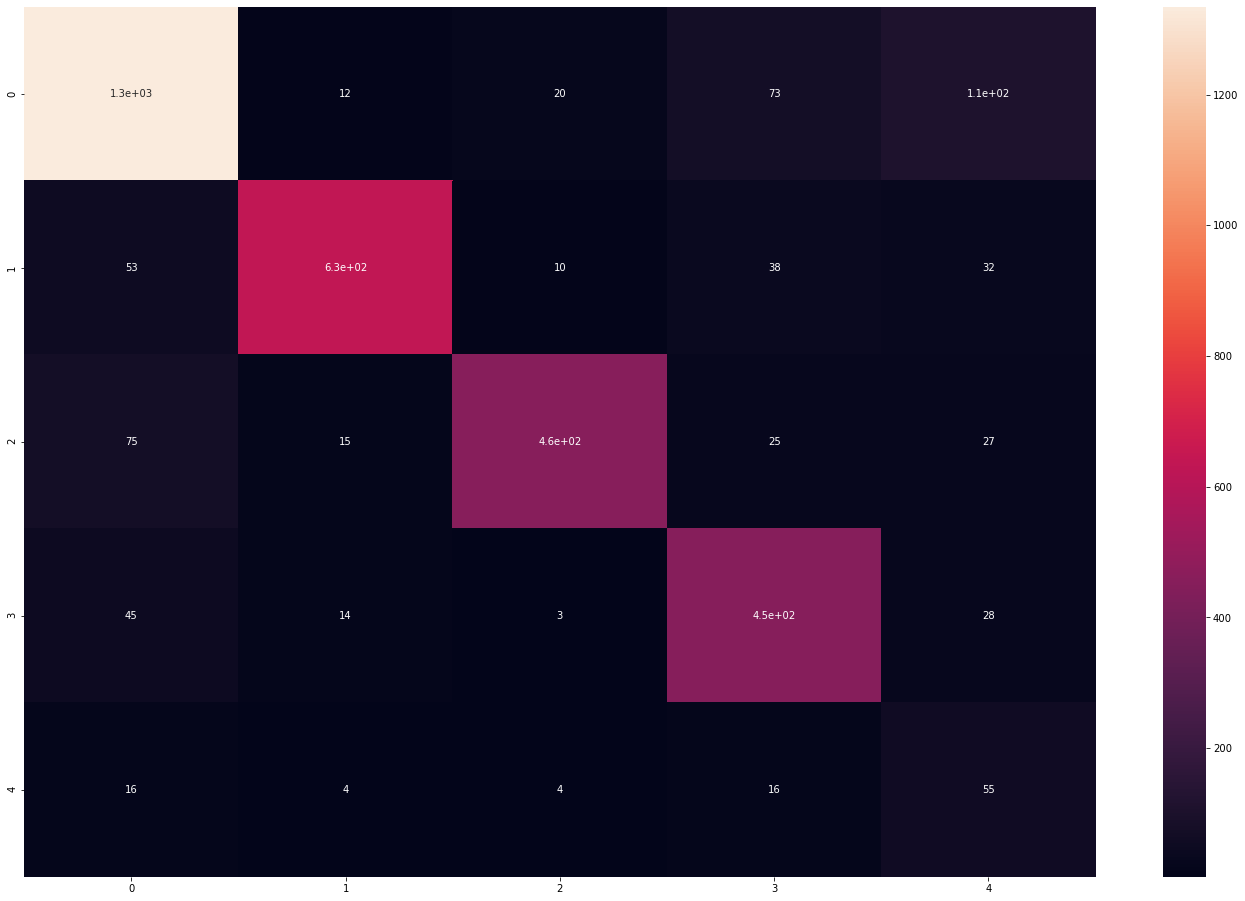

In [133]:
plt.figure(figsize = [24, 16])
sns.heatmap(confusion_matrix(pred_ethnicity, y_test_ethnicity), annot = True)

In [134]:
def plot_predictions(image, pred, actual):
    plt.figure(figsize = [24, 15])
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image[i])
        plt.xlabel(f'Actual Ethnicity: {actual[i]}')
        plt.ylabel(f'Predicted Ethnicity: {pred[i]}')
    plt.show()

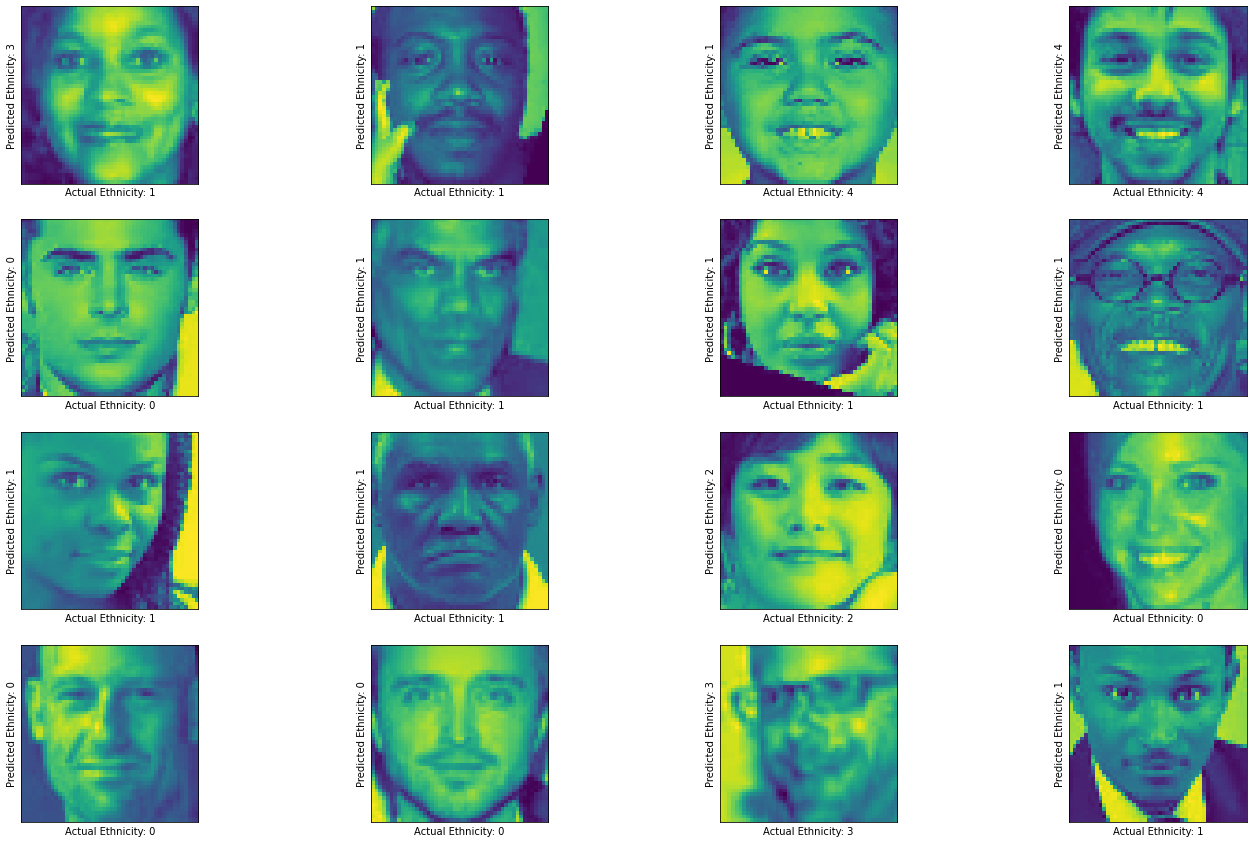

In [135]:
plot_predictions(x_test_ethnicity, pred_ethnicity, y_test_ethnicity)